Importing Necessary Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Training & Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve
)

# Ensemble Learning
from sklearn.ensemble import VotingClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Load and Explore the Dataset (Exploratory Data Analysis (EDA)

In [2]:
# Load dataset

credit_card_F_dataset = pd.read_csv("C:\\Users\\USER\\Downloads\\creditcard.csv")

In [3]:
# Display the first few rows

print(credit_card_F_dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check basic statistics of the dataset

print(credit_card_F_dataset.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# Check dataset shape

print(credit_card_F_dataset.shape)

(284807, 31)


In [7]:
# Check for missing values

credit_card_F_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Check class distribution

credit_card_F_dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

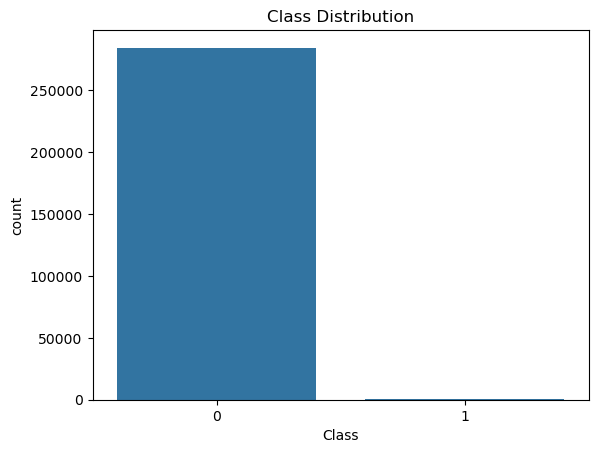

In [9]:
# Plot class distribution

sns.countplot(x=credit_card_F_dataset["Class"])
plt.title("Class Distribution")
plt.show()

Splitting Data into Features & Labels

In [10]:
# imbalance ratio of fruad cases and normal cases

fraud_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 1]
normal_cases = credit_card_F_dataset[credit_card_F_dataset["Class"] == 0]


imbalance_ratio = len(normal_cases) / len(fraud_cases)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 577.88


In [11]:
print('Shape of Fraud Cases =', fraud_cases.shape)  # shape of fraud_cases

print('Shape of Normal Cases =', normal_cases.shape) # shape of normal_cases

Shape of Fraud Cases = (492, 31)
Shape of Normal Cases = (284315, 31)


In [12]:
# Define features (X) and target variable (y)
X = credit_card_F_dataset.drop(columns=["Class"])  # Features
y = credit_card_F_dataset["Class"]  # Target variable (fraud or not)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Scaling the Data

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Models

In [15]:
# Train an Initial XGBoost Model

best_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

# Train an Initial Random Forest Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an Initial Logistic Regression Model

log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

Model Evaluation

In [16]:
# Make predictions for each model

y_pred_xgb = best_xgb.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Define evaluation function
def evaluate_model(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-PR: {auc_pr:.4f}')

print("\n📌 XGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)

print("\n📌 Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)

print("\n📌 Logistic Regression Performance:")
evaluate_model(y_test, y_pred_log)


📌 XGBoost Performance:
Precision: 0.9186
Recall: 0.8061
F1-Score: 0.8587
AUC-PR: 0.7408

📌 Random Forest Performance:
Precision: 0.9412
Recall: 0.8163
F1-Score: 0.8743
AUC-PR: 0.7686

📌 Logistic Regression Performance:
Precision: 0.8289
Recall: 0.6429
F1-Score: 0.7241
AUC-PR: 0.5335


Hyperparameter Tuning (Finding the Best XGBoost Model)

In [17]:
# Define hyperparameter grid

param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2],
    "scale_pos_weight": [1, 10, 25]  # Handling class imbalance
}

# Perform Randomized Search

xgb_search = RandomizedSearchCV(XGBClassifier(eval_metric="logloss"),
                                param_distributions=param_grid,
                                n_iter=10, scoring="f1", cv=3, random_state=42, n_jobs=-1)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

Precision-Recall Curve after Adjusting the Decision Threshold

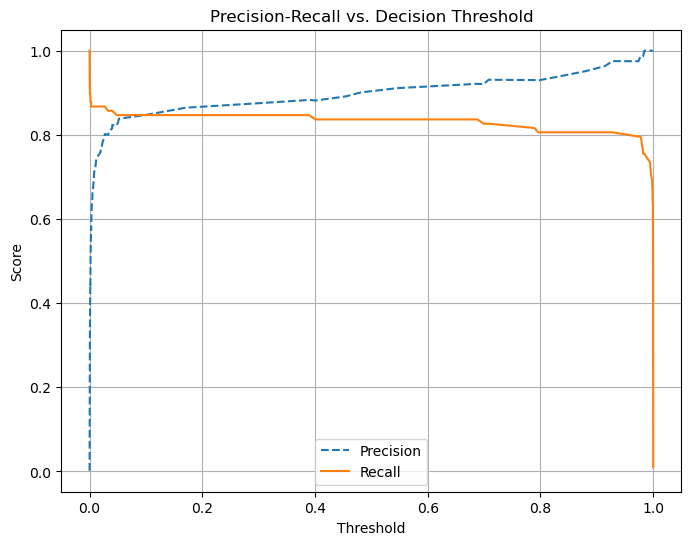

In [20]:
# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()

Adjusting the Decision Threshold

In [25]:
# Get fraud probability predictions

y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Get probabilities for fraud class

# Set a custom threshold (e.g., 0.3 instead of 0.5)

threshold = 0.6
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate new threshold

precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"\n📌 Custom Threshold ({threshold}):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


📌 Custom Threshold (0.6):
Precision: 0.9213
Recall: 0.8367
F1-Score: 0.8770


Building an Ensemble Model (XGBoost + RF + Logistic)

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('log', LogisticRegression())
    ],
    voting='soft',  # Probability-based voting
    weights=[3, 2, 1]  # Giving more weight to XGBoost
)
ensemble_model.fit(X_train, y_train)

Stacking Instead of Averaging

In [ ]:
# Train individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train stacking model (Logistic Regression as meta-model)
stacking_model = LogisticRegression()
stacking_features = np.column_stack([
    best_xgb.predict_proba(X_test)[:, 1],
    rf_model.predict_proba(X_test)[:, 1],
    log_model.predict_proba(X_test)[:, 1]
])
stacking_model.fit(stacking_features, y_test)
y_pred_stacked = stacking_model.predict(stacking_features)

# Evaluate stacked model
precision = precision_score(y_test, y_pred_stacked)
recall = recall_score(y_test, y_pred_stacked)
f1 = f1_score(y_test, y_pred_stacked)
auc_pr = average_precision_score(y_test, y_pred_stacked)

print("\n📌 Stacked Model Performance:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

SHAP Analysis for Feature Importance

In [ ]:
# SHAP Analysis for Feature Importance

explainer_xgb = shap.Explainer(best_xgb)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test)

explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf(X_test)
shap.summary_plot(shap_values_rf, X_test)

explainer_log = shap.Explainer(log_model)
shap_values_log = explainer_log(X_test)
shap.summary_plot(shap_values_log, X_test)

In [27]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities for XGBoost
y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Get the fraud class probabilities

# Compute Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find the best threshold: maximize recall while keeping precision ≥ 85%
best_threshold = 0.4  # Default
for p, r, t in zip(precisions, recalls, thresholds):
    if p >= 0.85:  # Ensure precision is at least 85%
        best_threshold = t  # Update threshold when condition is met

print(f"📌 Best Adjusted Threshold: {best_threshold:.2f}")

# Apply the new threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Re-evaluate the model
precision_adj = precision_score(y_test, y_pred_adjusted)
recall_adj = recall_score(y_test, y_pred_adjusted)
f1_adj = f1_score(y_test, y_pred_adjusted)

print("\n📊 Performance with Adjusted Threshold:")
print(f"Precision: {precision_adj:.4f}")
print(f"Recall: {recall_adj:.4f}")
print(f"F1-Score: {f1_adj:.4f}")


📌 Best Adjusted Threshold: 1.00

📊 Performance with Adjusted Threshold:
Precision: 1.0000
Recall: 0.0102
F1-Score: 0.0202


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=20, scoring='f1', 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_search.fit(X_train, y_train)

# Best Parameters
best_rf = rf_search.best_estimator_
print("📌 Best Random Forest Parameters:", rf_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

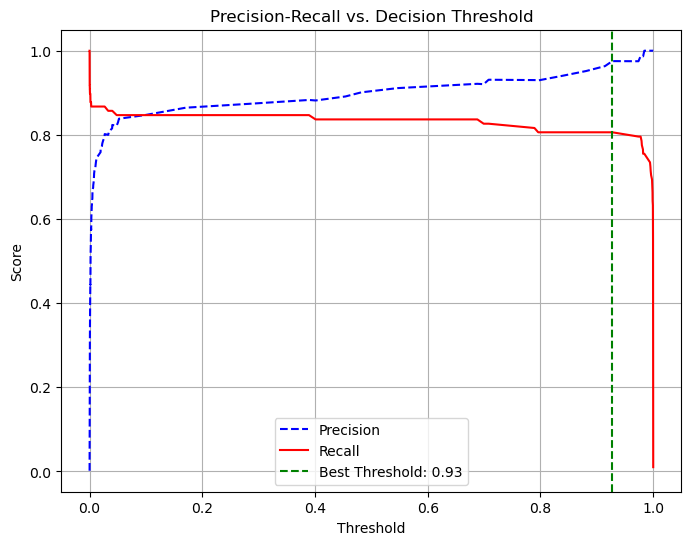

📌 Best Adjusted Threshold: 0.93


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1-scores
f1_scores = (2 * precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.axvline(x=best_threshold, color='g', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs. Decision Threshold')
plt.grid()
plt.show()

print(f"📌 Best Adjusted Threshold: {best_threshold:.2f}")


In [31]:
# Apply the new threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluate model
from sklearn.metrics import precision_score, recall_score, f1_score

precision_adj = precision_score(y_test, y_pred_adjusted)
recall_adj = recall_score(y_test, y_pred_adjusted)
f1_adj = f1_score(y_test, y_pred_adjusted)

print(f"📊 Performance with Adjusted Threshold ({best_threshold:.2f}):")
print(f"Precision: {precision_adj:.4f}")
print(f"Recall: {recall_adj:.4f}")
print(f"F1-Score: {f1_adj:.4f}")


📊 Performance with Adjusted Threshold (0.93):
Precision: 0.9753
Recall: 0.8061
F1-Score: 0.8827


In [35]:
# Set a custom threshold (adjust this value manually)
custom_threshold = 0.65 # Change this value to test different thresholds

# Apply the new threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate model performance
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print(f"📌 Custom Threshold ({custom_threshold}):")
print(f"Precision: {precision_custom:.4f}")
print(f"Recall: {recall_custom:.4f}")
print(f"F1-Score: {f1_custom:.4f}")


📌 Custom Threshold (0.65):
Precision: 0.9213
Recall: 0.8367
F1-Score: 0.8770
